# Ejercicio WWCode: Análisis Dataset Pokemon 




## Objetivo del ejercicio
Se quiere contruir un pequeño Data Storytelling sobre una primera exploración de los datos de pokemon.


#### Etapas para construir un Data Storytelling.

1. Identifica quién es tu público objetivo
2. Ten claro el mensaje qué quieres entregar, qué conclusiones vas a mostrar, cuál es tu mensaje estrella.
3. Puedes hacer un pequeña maqueta con tus ideas y tipos de gráficos que crees pueden ser los correctos.
4. Elaborar el material para construir tu Data Storytelling (plantilla de powerpoint, Notebook con los datos, gráficos, texto)
5. Date una vuelta, despéjate un rato y luego vuelve a revisar tu trabajo para ver que sea coherente desde la perspectiva de los datos y de la narración que quieres construir


#### Algunos tips para la construcción.

1. Recuerda usar los diferentes tamaños de texto para separar secciones de contenido
2. Es una buena idea agregar texto en la celda anterior al segmento de código. El contenido de este texto puede ser una breve descripción el gráfico que se está usando, insights descubiertos a partir del gráfico, variables implicadas, metodología de trabajo en caso que existiese, etc. Cualquier información que sea relevante para entender tu gráfico
3. Si tu segmento de código tiene lógicas implementadas, agrega comentarios dentro del código para que este se entienda mejor.
4. Un posible esquema para abordar los datos es ir de lo general a lo particular
5. Se consistente con tu código de colores, si usaste un color específico para una variable trata de mantenerlo a través de todo el notebook.
6. Cuando hagas 2 gráficos que tienen un mismo eje, asegúrate que estén en el mismo orden (en caso de ser variables categóricas) o en la misma magnitud (en caso de ser numéricas)


- Link de Matplotlib: https://matplotlib.org/tutorials/index.html
- Link de Seaborn: https://seaborn.pydata.org/examples/index.html


Cualquier duda, consulta, comentario, meme, lo que sea! Siempre puedes preguntarme c: . Me ubicas en Linkedin: https://www.linkedin.com/in/elicarreno/ o en cualquier red social.

## Introducción

En este ejercicio se va a revisar el dataset de pokemon.


In [0]:
#Librerías

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

## Resumen Dataset

El dataset contiene 12 columnas con la siguiente información:

- Name: Nombre del pokemon
- Type1: Tipo 1 
- Type2: Tipo 2
- Total: Suma de los puntos de ataque y defensa.
- Attack: Puntos de ataque
- Defense: Puntos de defensa
- Sp.Atk: Puntos de Ataque especial
- Sp Def: Puntos de defensa especial
- Speed: Velocidad de ataque
- Generation: Generacion correspondiente
- Legendary: Indica si el pokemon es legendario (true) o no (false)

In [10]:
#Carga de datos

data = pd.read_csv('Pokemon.csv')
data.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


El dataset original contiene 800 registros

In [0]:
len(data)

800

In [0]:
data.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


## Análisis de Variables


### Tipo

En el siguiente gráfico se revisó la cantidad de pokemones existentes por tipo. Se puede observar que el tipo de pokemons que está mas presente en el dataset son los tipo agua, seguido de los tipo normal. Por otro lado, los que son menos frecuentes corresponden al tipo hada y volador.


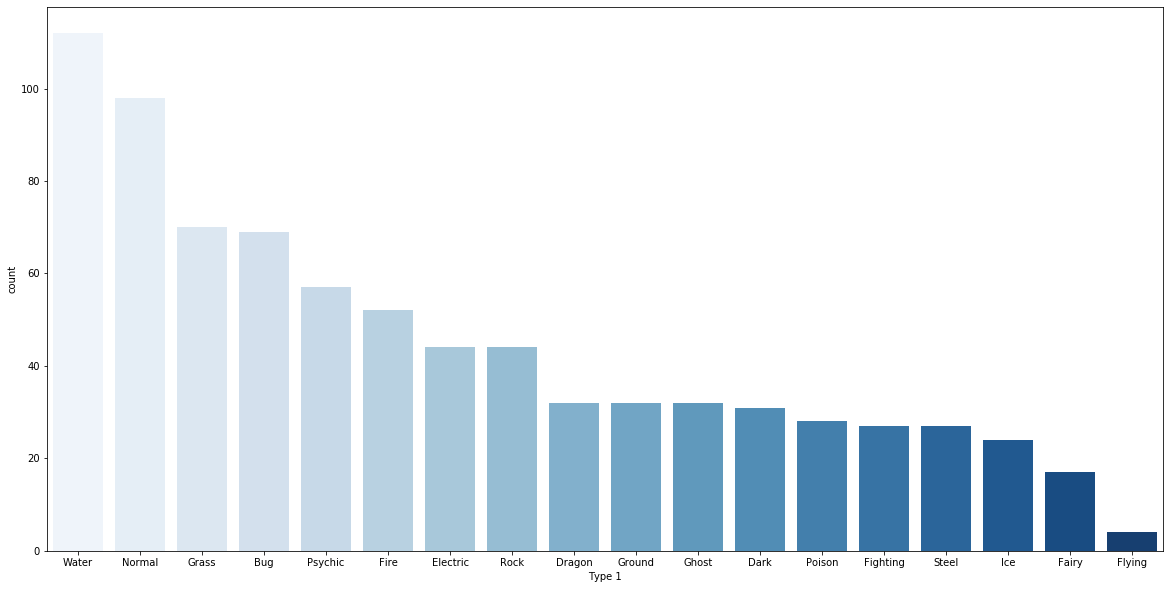

In [0]:
#Tamaño
plt.figure(figsize=(20,10))

#Gráfico
sns.countplot(data=data,x='Type 1',palette='Blues',order = data['Type 1'].value_counts().index)


Por el contrario, cuando se revisa la cantidad de pokemones de tipo 2, los de tipo Hada son los que mayor presencia tiene en el dataset

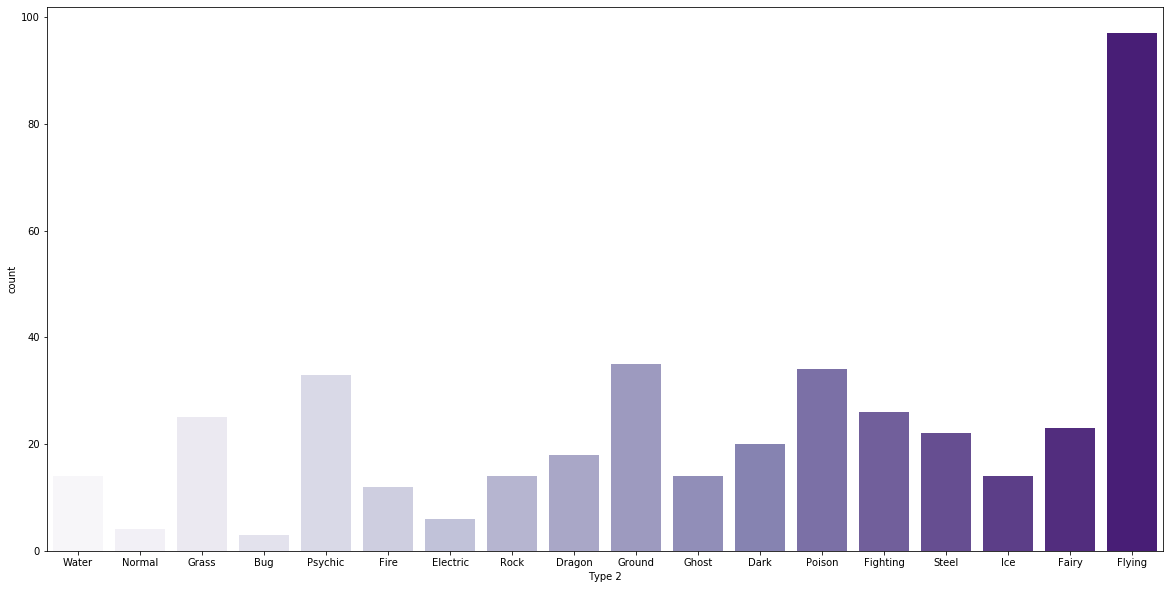

In [0]:
#Tamaño
plt.figure(figsize=(20,10))

#Gráfico
sns.countplot(data=data,x='Type 2',palette='Purples',order = data['Type 1'].value_counts().index)

Si se revisan tipo 1 y tipo 2 en conjunto, se puede observar que la combinación que se da con mayor frecuencia es la **Normal-Flying** y **Bug-Flying**

Text(0.5, 1, 'Distribución de tipos de pokemon')

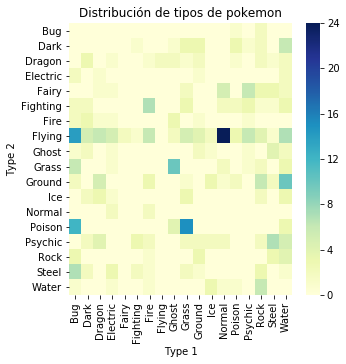

In [0]:
data['count']=1

#Agrupación de datos por Tipo 1 y Tipo 2
agrupacion = data.groupby(by=['Type 1','Type 2'],as_index=False).count()

#Pivotear los datos
p = agrupacion.pivot('Type 2','Type 1','count')

#Reemplaza null por valor cero y deja números en entero.
p = p.fillna(0).astype(int)

#Construcción del gráfico.
plt.figure(figsize=(5,5))
sns.heatmap(p,cmap="YlGnBu")
plt.title("Distribución de tipos de pokemon")

### Ataque y defensa

En el siguiente gráfico se muestran cómo se distribuye la variable ataque por tipo. Se puede apreciar que en varios tipos de pokemon existen registros atípicos.


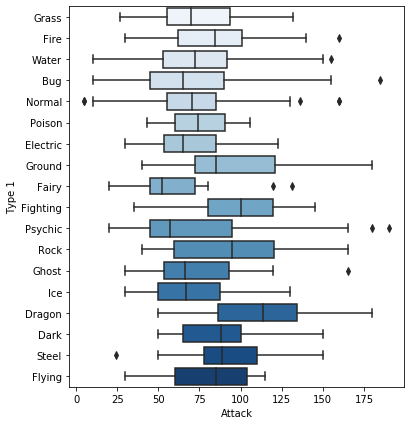

In [0]:
plt.figure(figsize=(6,7))
sns.boxplot(data=data,x='Attack',y='Type 1',palette='Blues')

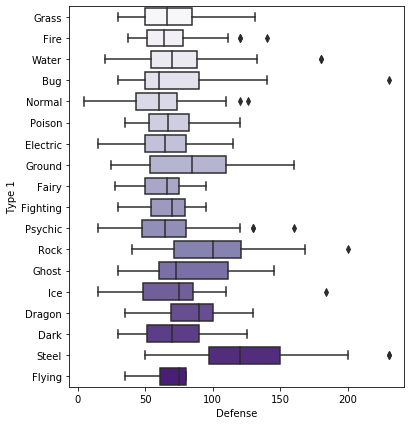

In [0]:
plt.figure(figsize=(6,7))
sns.boxplot(data=data,x='Defense',y='Type 1',palette='Purples')

Al revisar el comportamiento del ataque y defensa por tipo, se puede apreciar que no existe una relación fuerte entre ambas variables

Text(0.5, 1.0, 'Distribución de Ataque y Defensa por tipo')

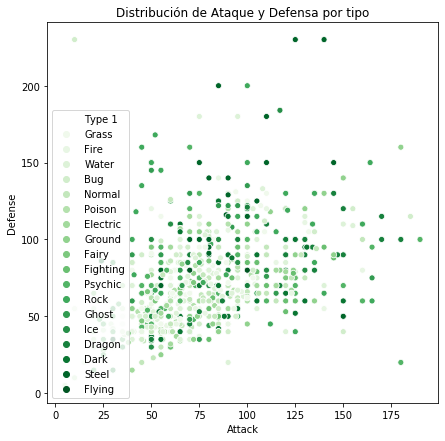

In [0]:
plt.figure(figsize=(7,7))
ax=sns.scatterplot(data=data,x='Attack',y='Defense',hue ='Type 1',palette='Greens')
ax.legend(loc='lower left')
plt.title('Distribución de Ataque y Defensa por tipo')

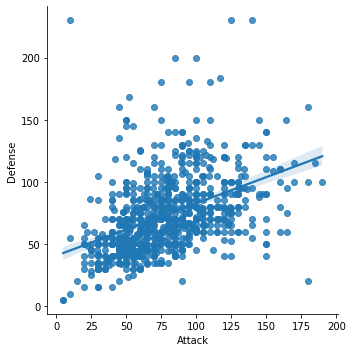

In [0]:
g = sns.lmplot(x="Attack", y="Defense",truncate=True, height=5, data=data)

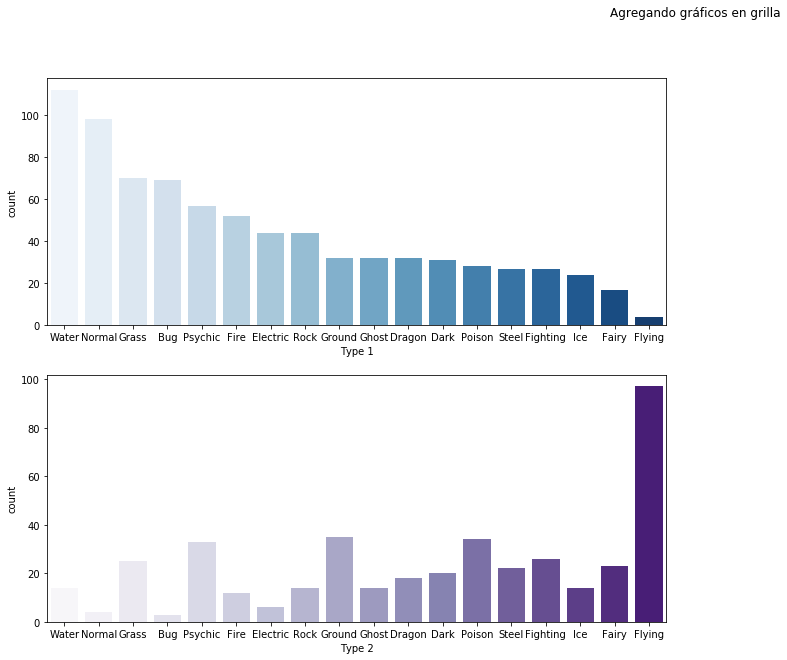

In [23]:
#Algo que no alcancé a mostrartes en el taller es como armar una grilla con gráficos y puedan verse un poco más ordenados. 
#Utilizaré como base los gráficos de barra y agregué una librería adicional



#Tamaño en general del área de ploteo


fig = plt.figure(figsize=(20,10))
fig.suptitle("Agregando gráficos en grilla")


#creamos la grilla, los dos primeros elementos son la cantidad de columas y filas. Los otros 2 tiene que ver con la separación entre los gráficos
gs = GridSpec(2, 1, left=0.05, right=0.48, wspace=0.05)


#Selecciona espacio para primer gráfico
fig.add_subplot(gs[0, 0])

#Creación primer gráfico
sns.countplot(data=data,x='Type 1',palette='Blues',order = data['Type 1'].value_counts().index)



#Selecciona espacio para segundo gráfico
fig.add_subplot(gs[1, 0])


#Creación segundo gráfico
sns.countplot(data=data,x='Type 2',palette='Purples',order = data['Type 1'].value_counts().index)
